## Optimization of PV module tilt angle and orientation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math as mt

plt.style.use('ggplot')

### Data for Delft, The Netherlands

In [2]:
df = pd.read_table('Delft.dat', delimiter=',', index_col='DateT', parse_dates=True)

In [3]:
df.head()

,As,as,GHI,DHI,DNI
DateT,,,,,
2005-01-01 01:00:00,7.6,0.0,0,0,0
2005-01-01 02:00:00,20.8,0.0,0,0,0
2005-01-01 03:00:00,44.8,0.0,0,0,0
2005-01-01 04:00:00,63.5,0.0,0,0,0
2005-01-01 05:00:00,78.0,0.0,0,0,0


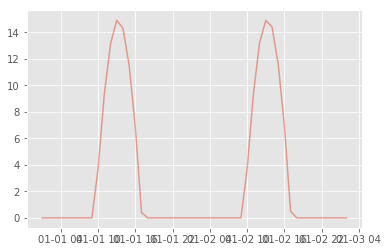

In [4]:
plt.plot(df['as'][0:50], alpha=0.5);

In [5]:
df.columns

Index(['As', 'as', 'GHI', 'DHI', 'DNI'], dtype='object')

As - sun's azimuth; as -sun's angle, GHI - global horizontal irradiance, DHI - difuse horizontal irradiance, DNI - direct normal irradiance

In [6]:
def findOptimalPos(df, albedo=0.2, plot=False):
    '''Placeholde for help'''
    
    # Sun's azimuth
    As = np.array(df['As']) 
    
    # Sun's angle
    a_s = np.array(df['as']) 
    
    # global horizontal irradiance
    GHI = np.array(df['GHI']) 
    
    # direct horizontal irradiance
    DHI = np.array(df['DHI']) 
    
    # direct normal irradiance
    DNI = np.array(df['DNI']) 
    
    # albedo coefficient
    alpha = albedo

    # Module azimuth with a step o 2 degrees
    Am = np.arange(0, 361, 2)

    # module tilt angle with a step o 2 degrees
    theta = np.arange(0, 91, 2)

    # module angle
    am = 90 - theta
    
    # calculating energy
    Em = np.empty([len(Am), len(am)])
    for k in range(len(Am)):
        for i in range(len(am)):
            cos_AOI = [np.cos(np.radians(am[i])) * np.cos(np.radians(a_s)) * \
                       np.cos(np.radians(Am[k] - As)) + np.sin(np.radians(am[i])) * np.sin(np.radians(a_s))]
            Gdirect = DNI * cos_AOI
            SVF = (1 + np.cos(np.radians(90-am[i])))/2
            Gdiffuse = SVF * DHI
            Galbedo = GHI * alpha * (1-SVF)
            Em[k,i] = np.sum(Gdirect + Gdiffuse + Galbedo)/1000 
    
    # finding the optimal angle and azimuth
    (m,n) = np.unravel_index(Em.argmax(), Em.shape)
    
    # plotting
    if plot:
        plt.figure(figsize=(14,10))
        plt.xlabel('Module Azimuth [deg]')
        plt.ylabel('Energy [kWh/m2]')
        for k in range(len(am)):
            plt.scatter(Am, Em[:,k], marker='.', label='am %s' %(2*k))
            plt.axvline(x=Am[m], color='grey', linestyle=':')
            plt.axhline(np.max(Em), color='grey', linestyle=':')
            plt.legend();
    
    return Em, np.max(Em), Am[m], am[n]

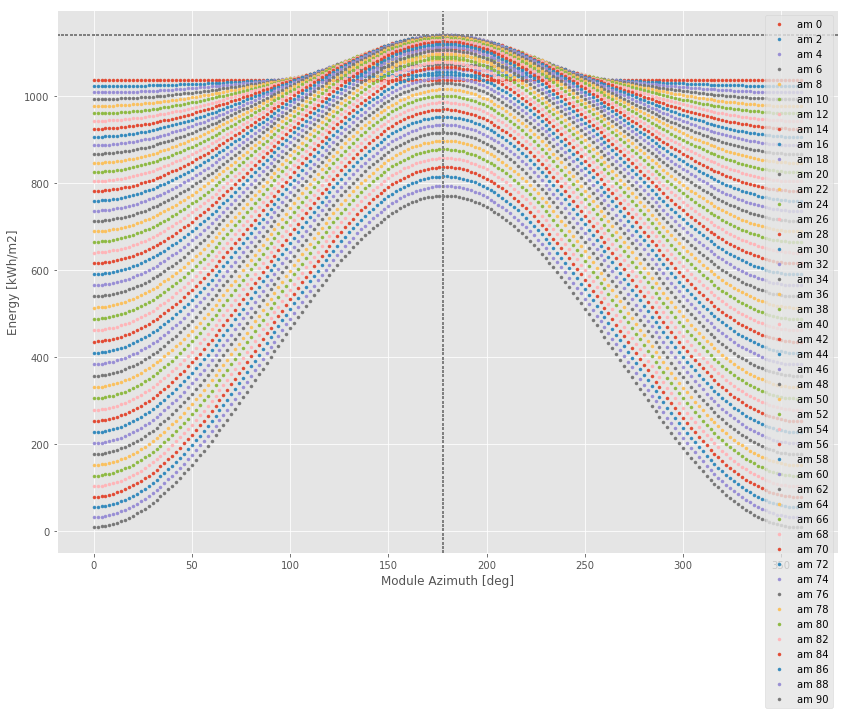

In [7]:
Ed, Edmax, Adm, adm = findOptimalPos(df, plot=True)

In [8]:
Edmax

1139.5936356127229

In [9]:
Adm

178

In [10]:
adm

60

#### Contourplot

In [11]:
def plotEcontour(E, Am_max, am_max):
    # Module azimuth with a step o 2 degrees
    Am = np.arange(0, 361, 2)

    # module tilt angle with a step o 2 degrees
    theta = np.arange(0, 91, 2)

    # module angle
    am = 90 - theta

    plt.figure(figsize=(10,8))
    X, Y = np.meshgrid(am, Am)
    plt.contourf(X, Y, E, 100, cmap='coolwarm')
    plt.axvline(x=am_max, color='grey', linestyle=':')
    plt.axhline(Am_max, color='grey', linestyle=':')
    plt.xlabel('PV module angle [deg]')
    plt.ylabel('PV module azimuth [deg]')
    plt.colorbar();

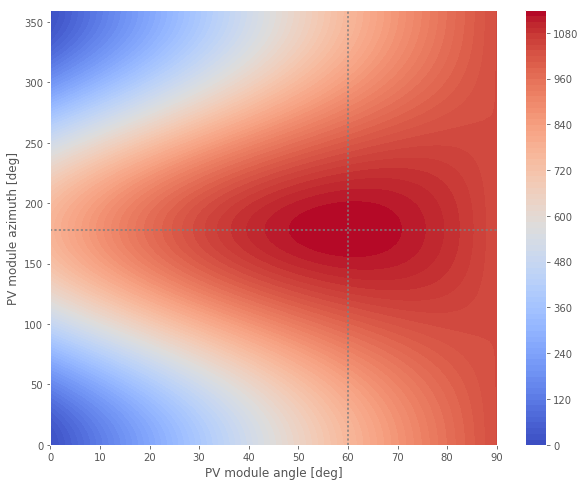

In [12]:
plotEcontour(Ed, Adm, adm)

## Data for Buenos Aires

In [13]:
df2 = pd.read_csv('Buenos_Aires.dat', delimiter=',', index_col='DateT', parse_dates=True)

In [14]:
df2.head()

,As,as,GHI,DHI,DNI
DateT,,,,,
2005-01-01 01:00:00,172.8,0.0,0,0,0
2005-01-01 02:00:00,171.5,0.0,0,0,0
2005-01-01 03:00:00,155.8,0.0,0,0,0
2005-01-01 04:00:00,142.5,0.0,0,0,0
2005-01-01 05:00:00,130.9,0.0,0,0,0


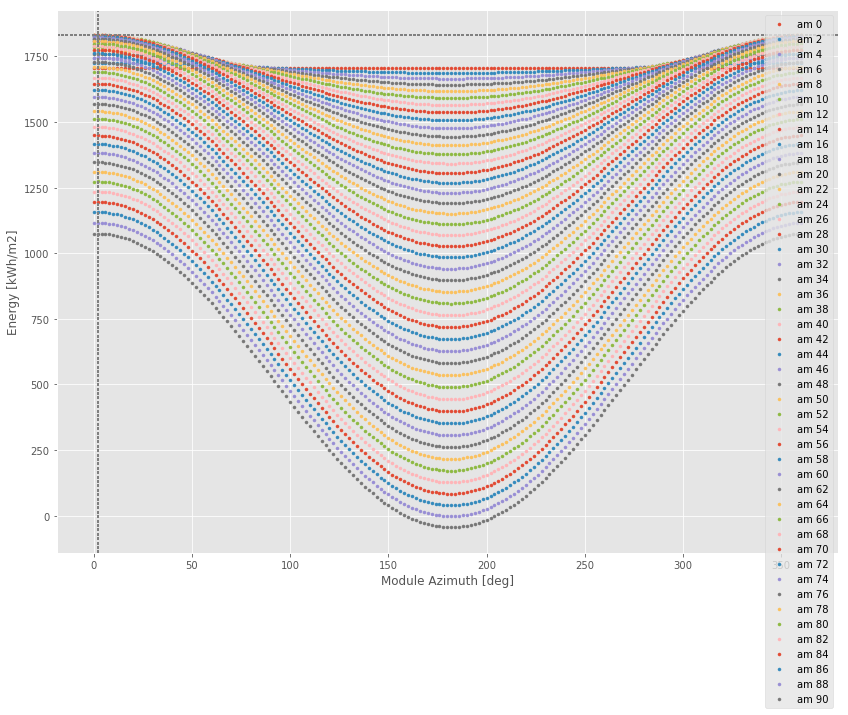

In [15]:
Eba, Ebam, Abam, abam = findOptimalPos(df2, plot=True)

In [16]:
Ebam

1832.0168235023223

In [17]:
Abam

2

In [18]:
abam

64

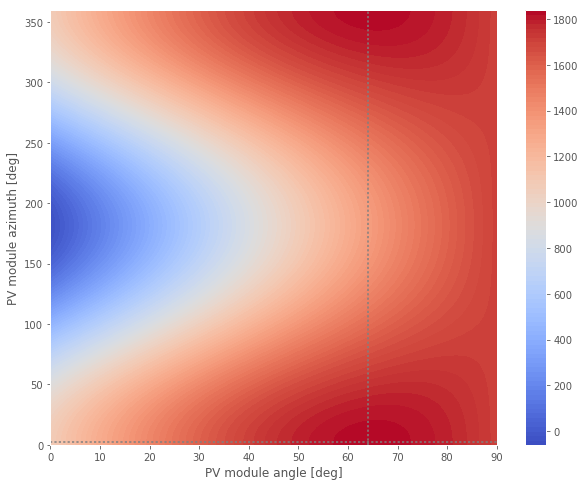

In [19]:
# contour plot
plotEcontour(Eba, Abam, abam)

## Data for Vancouver

In [20]:
df3 = pd.read_csv('Vancouver.dat', delimiter=',', index_col='DateT', parse_dates=True)

In [21]:
df3.head()

,As,as,GHI,DHI,DNI
DateT,,,,,
2005-01-01 01:00:00,7.6,0.0,0,0,0
2005-01-01 02:00:00,35.9,0.0,0,0,0
2005-01-01 03:00:00,57.6,0.0,0,0,0
2005-01-01 04:00:00,73.6,0.0,0,0,0
2005-01-01 05:00:00,86.5,0.0,0,0,0


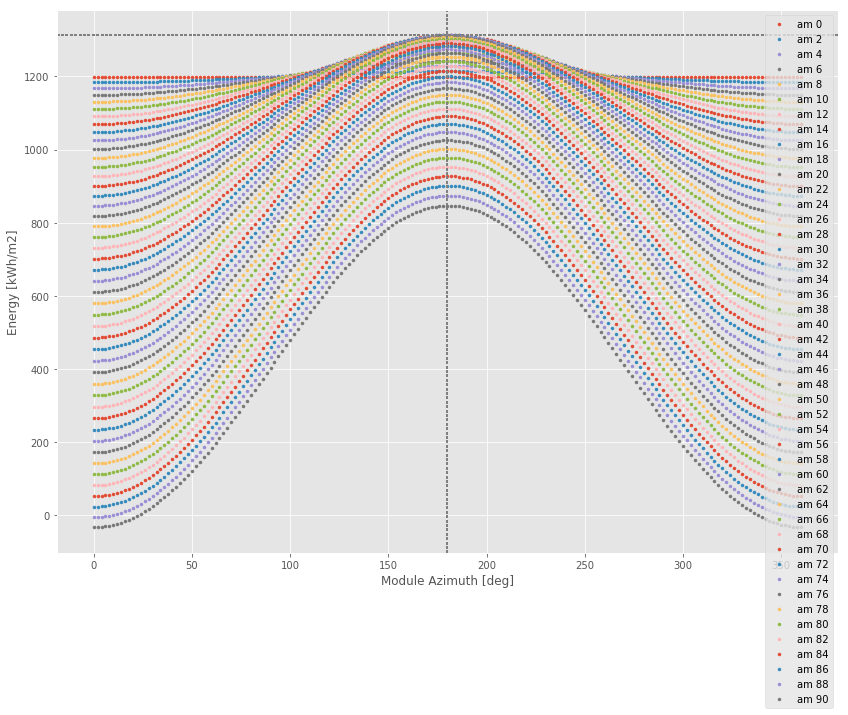

In [22]:
Ev, Evm, Avm, avm = findOptimalPos(df3, plot=True)

In [23]:
Evm

1313.098742085599

In [24]:
Avm

180

In [25]:
avm

60

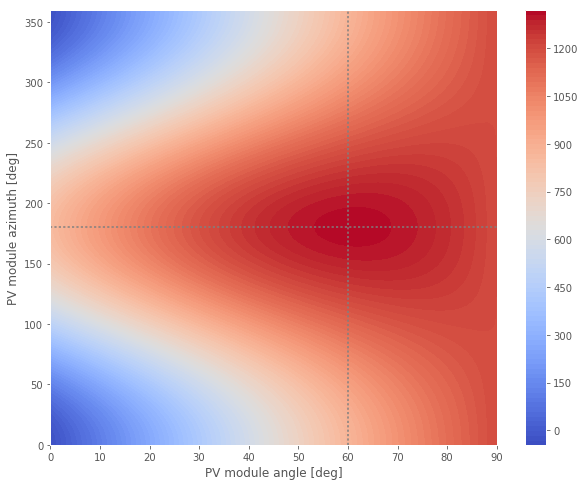

In [26]:
# contour plot
plotEcontour(Ev, Avm, avm)

## Data for New Dehli

In [27]:
df4 = pd.read_csv('New_Delhi.dat', delimiter=',', index_col='DateT', parse_dates=True)

In [28]:
df4.head()

,As,as,GHI,DHI,DNI
DateT,,,,,
2005-01-01 01:00:00,13.8,0.0,0,0,0
2005-01-01 02:00:00,73.6,0.0,0,0,0
2005-01-01 03:00:00,86.6,0.0,0,0,0
2005-01-01 04:00:00,93.7,0.0,0,0,0
2005-01-01 05:00:00,99.6,0.0,0,0,0


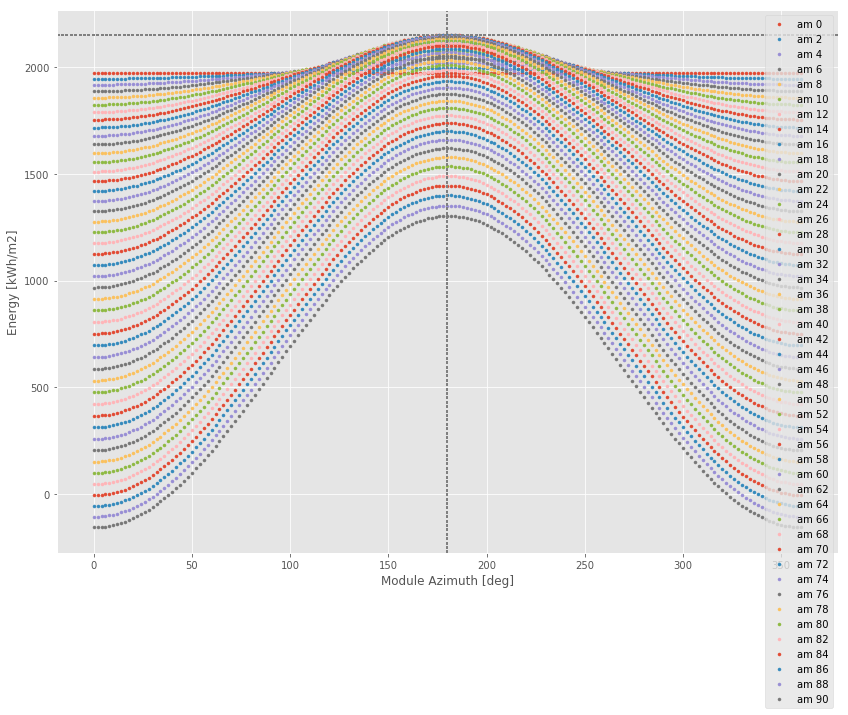

In [29]:
End, Endm, Andm, andm = findOptimalPos(df4, plot=True)

In [30]:
Andm

180

In [31]:
andm

62

In [32]:
Endm

2151.1260713231327

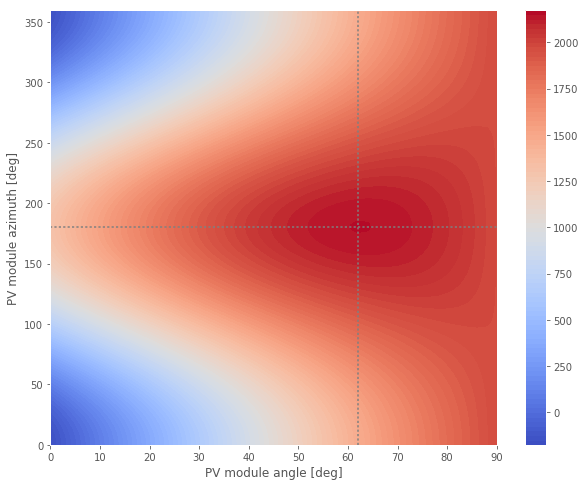

In [33]:
# contour plot
plotEcontour(End, Andm, andm)

### Licensing
This material was created by or adapted from material posted on the Delftx website, delftx.tudelft.nl, and created by TU Delft faculty member Olindo Isabella, Asistant Professor, 2017. DelftX is not responsible for any changes made to the original materials posted on its website and any such changes are the sole responsibility of the author of this notebook.